## UQ Course, Dec. 2020, Hands-on Exercise - Solutions

Consider a damped harmonic oscillator for which:
$$
\begin{cases}
\ddot{y} + C\dot{y}+K y =0,\\
y(0)=y_0\,,\dot{y}(0)=v_0 
\end{cases}
$$

where, the damping coefficient $C$ and the spring constant $K$ are random: $C\sim \mathcal{N}(\bar{C},\sigma^2_C)$ and $K\sim \mathcal{N}(\bar{K},\sigma^2_K)$.

The exact solution for $y(t;C,K)$ is given by:
$$
y(t) = \exp(-Ct/2) \left(c_1 \cos(\omega t) + c_2 \sin(\omega t) \right) \,,
$$

where $c_1=y_0$ and $c_2=(v_0+Cy_0/2)/\omega$, and $\omega = \sqrt{K-C^2/4}$. 

Consider the following values:
* $\bar{C}=1$, $\sigma_C=0.2$
* $\bar{K}=12$, $\sigma_K=1.0$
* $y_0=0$, $v_0=1$

In the UQ forward problem, we aim at estimating the uncertainty propagated from $C$ and $K$ into $y(t)$ for $t\in[0,T]$, where $T=10$. 

In this exercise, we perform the UQ forward problem through the following approaches to estimate $\mathbb{E}[y(t)]$ and $\mathbb{V}[y(t)]$:

#### 1. Monte-Carlo method.
#### 2. Polynomial chaos expansion (PCE) as implemented in `UQit`.
#### 3. Perturbation method. (optional)


Also, we would like to perform global sensitivity analysis to see the relative importance of $C$ and $K$ at different times. Therefore, the next task is to:
#### 4. Compute the Sobol sensitivity indices to address the sensitivity of $y(t)$ to $C$ and $K$  (use `UQit`).

Hint. Note that the statsitical moments are $t$-dependent, so we need a loop over time. 

-----------------------------

In [1]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt
# UQit tools
from UQit.pce import pce,pceEval,convPlot
from UQit.sampling import trainSample
from UQit.reshaper import vecs2grid
from UQit.sobol import sobol

The following function returns $y$ at a given $t$ and given values of $C$ and $K$. Note that the values for the $C$ and $K$ can be `numpy` arrays.

In [2]:
def modelFunc(t,C,K,y0=0.,v0=1.0):
    """
    model function for harmonic oscillation                    
    Args:
       t: time
       C: damping coeffcient
       K: spring constant
       y0: initial location
       v0: initial velocity
    Returns:   
       y: location at time t 
    """
    tmp=K-C**2./4.
    if tmp.any()<0:
       raise ValueError('Overdamped case!')
    else:
       freq=np.sqrt(tmp)
    c2=(v0+C*y0/2.)/freq
    y=np.exp(-C*t/2)*(y0*np.cos(freq*t)+c2*np.sin(freq*t))
    return y

### 1. Monte Carlo:

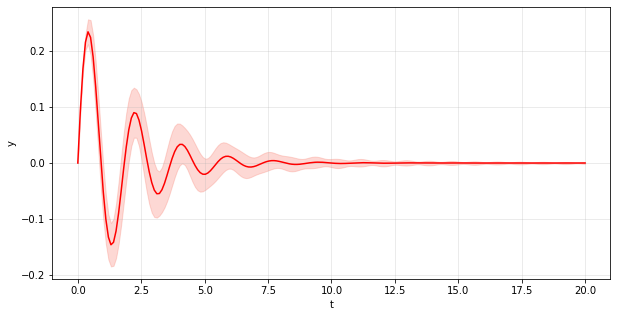

In [6]:
#--- Settings -----
nMC=1000
qInfo=[[1,0.2],             #info of the parameters
       [12,1]]
nT=200   #number of time steps
tEnd=20   #end time
#-------------------

#time discretization
t=np.linspace(0,tEnd,nT)

#MC samples for C & K
C=np.random.normal(qInfo[0][0],qInfo[0][1],size=nMC)
K=np.random.normal(qInfo[1][0],qInfo[1][1],size=nMC)

yMean=[]
yStd=[]
for t_ in t:
    y_=modelFunc(t_,C,K)
    yMean_=np.mean(y_)
    yStd_=np.std(y_)
    yMean.append(yMean_)
    yStd.append(yStd_)
    
#plot     mean+CI
yMean=np.asarray(yMean)
yStd=np.asarray(yStd)
plt.figure(figsize=(10,5))
ax=plt.gca()
plt.plot(t,yMean,'-r')
ax.fill_between(t,yMean-1.96*yStd,yMean+1.96*yStd,color='salmon',alpha=0.3)
plt.grid(alpha=0.3)
plt.xlabel('t')
plt.ylabel('y')
plt.show()

### 2. PCE:

... Original method for PCE is replaced by 'Regression'.
... A gPCE for a 2-D parameter space is constructed.
...... PCE truncation method: TP
...... Method of computing PCE coefficients: Regression
...... Number of terms in PCE, K=  42
...... Number of Data point, n=  42
... Original method for PCE is replaced by 'Regression'.
... A gPCE for a 2-D parameter space is constructed.
...... PCE truncation method: TP
...... Method of computing PCE coefficients: Regression
...... Number of terms in PCE, K=  42
...... Number of Data point, n=  42
... Original method for PCE is replaced by 'Regression'.
... A gPCE for a 2-D parameter space is constructed.
...... PCE truncation method: TP
...... Method of computing PCE coefficients: Regression
...... Number of terms in PCE, K=  42
...... Number of Data point, n=  42
... Original method for PCE is replaced by 'Regression'.
... A gPCE for a 2-D parameter space is constructed.
...... PCE truncation method: TP
...... Method of computing PCE coeffic

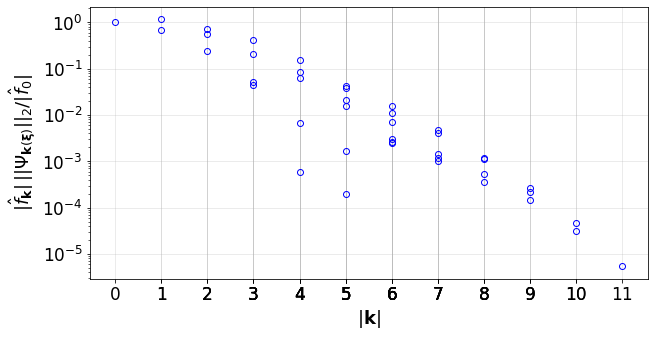

... Original method for PCE is replaced by 'Regression'.
... A gPCE for a 2-D parameter space is constructed.
...... PCE truncation method: TP
...... Method of computing PCE coefficients: Regression
...... Number of terms in PCE, K=  42
...... Number of Data point, n=  42
... Original method for PCE is replaced by 'Regression'.
... A gPCE for a 2-D parameter space is constructed.
...... PCE truncation method: TP
...... Method of computing PCE coefficients: Regression
...... Number of terms in PCE, K=  42
...... Number of Data point, n=  42
... Original method for PCE is replaced by 'Regression'.
... A gPCE for a 2-D parameter space is constructed.
...... PCE truncation method: TP
...... Method of computing PCE coefficients: Regression
...... Number of terms in PCE, K=  42
...... Number of Data point, n=  42
... Original method for PCE is replaced by 'Regression'.
... A gPCE for a 2-D parameter space is constructed.
...... PCE truncation method: TP
...... Method of computing PCE coeffic

... Original method for PCE is replaced by 'Regression'.
... A gPCE for a 2-D parameter space is constructed.
...... PCE truncation method: TP
...... Method of computing PCE coefficients: Regression
...... Number of terms in PCE, K=  42
...... Number of Data point, n=  42
... Original method for PCE is replaced by 'Regression'.
... A gPCE for a 2-D parameter space is constructed.
...... PCE truncation method: TP
...... Method of computing PCE coefficients: Regression
...... Number of terms in PCE, K=  42
...... Number of Data point, n=  42
... Original method for PCE is replaced by 'Regression'.
... A gPCE for a 2-D parameter space is constructed.
...... PCE truncation method: TP
...... Method of computing PCE coefficients: Regression
...... Number of terms in PCE, K=  42
...... Number of Data point, n=  42
... Original method for PCE is replaced by 'Regression'.
... A gPCE for a 2-D parameter space is constructed.
...... PCE truncation method: TP
...... Method of computing PCE coeffic

... Original method for PCE is replaced by 'Regression'.
... A gPCE for a 2-D parameter space is constructed.
...... PCE truncation method: TP
...... Method of computing PCE coefficients: Regression
...... Number of terms in PCE, K=  42
...... Number of Data point, n=  42
... Original method for PCE is replaced by 'Regression'.
... A gPCE for a 2-D parameter space is constructed.
...... PCE truncation method: TP
...... Method of computing PCE coefficients: Regression
...... Number of terms in PCE, K=  42
...... Number of Data point, n=  42
... Original method for PCE is replaced by 'Regression'.
... A gPCE for a 2-D parameter space is constructed.
...... PCE truncation method: TP
...... Method of computing PCE coefficients: Regression
...... Number of terms in PCE, K=  42
...... Number of Data point, n=  42
... Original method for PCE is replaced by 'Regression'.
... A gPCE for a 2-D parameter space is constructed.
...... PCE truncation method: TP
...... Method of computing PCE coeffic

... Original method for PCE is replaced by 'Regression'.
... A gPCE for a 2-D parameter space is constructed.
...... PCE truncation method: TP
...... Method of computing PCE coefficients: Regression
...... Number of terms in PCE, K=  42
...... Number of Data point, n=  42
... Original method for PCE is replaced by 'Regression'.
... A gPCE for a 2-D parameter space is constructed.
...... PCE truncation method: TP
...... Method of computing PCE coefficients: Regression
...... Number of terms in PCE, K=  42
...... Number of Data point, n=  42
... Original method for PCE is replaced by 'Regression'.
... A gPCE for a 2-D parameter space is constructed.
...... PCE truncation method: TP
...... Method of computing PCE coefficients: Regression
...... Number of terms in PCE, K=  42
...... Number of Data point, n=  42
... Original method for PCE is replaced by 'Regression'.
... A gPCE for a 2-D parameter space is constructed.
...... PCE truncation method: TP
...... Method of computing PCE coeffic

... Original method for PCE is replaced by 'Regression'.
... A gPCE for a 2-D parameter space is constructed.
...... PCE truncation method: TP
...... Method of computing PCE coefficients: Regression
...... Number of terms in PCE, K=  42
...... Number of Data point, n=  42
... Original method for PCE is replaced by 'Regression'.
... A gPCE for a 2-D parameter space is constructed.
...... PCE truncation method: TP
...... Method of computing PCE coefficients: Regression
...... Number of terms in PCE, K=  42
...... Number of Data point, n=  42
... Original method for PCE is replaced by 'Regression'.
... A gPCE for a 2-D parameter space is constructed.
...... PCE truncation method: TP
...... Method of computing PCE coefficients: Regression
...... Number of terms in PCE, K=  42
...... Number of Data point, n=  42
... Original method for PCE is replaced by 'Regression'.
... A gPCE for a 2-D parameter space is constructed.
...... PCE truncation method: TP
...... Method of computing PCE coeffic

... Original method for PCE is replaced by 'Regression'.
... A gPCE for a 2-D parameter space is constructed.
...... PCE truncation method: TP
...... Method of computing PCE coefficients: Regression
...... Number of terms in PCE, K=  42
...... Number of Data point, n=  42
... Original method for PCE is replaced by 'Regression'.
... A gPCE for a 2-D parameter space is constructed.
...... PCE truncation method: TP
...... Method of computing PCE coefficients: Regression
...... Number of terms in PCE, K=  42
...... Number of Data point, n=  42
... Original method for PCE is replaced by 'Regression'.
... A gPCE for a 2-D parameter space is constructed.
...... PCE truncation method: TP
...... Method of computing PCE coefficients: Regression
...... Number of terms in PCE, K=  42
...... Number of Data point, n=  42
... Original method for PCE is replaced by 'Regression'.
... A gPCE for a 2-D parameter space is constructed.
...... PCE truncation method: TP
...... Method of computing PCE coeffic

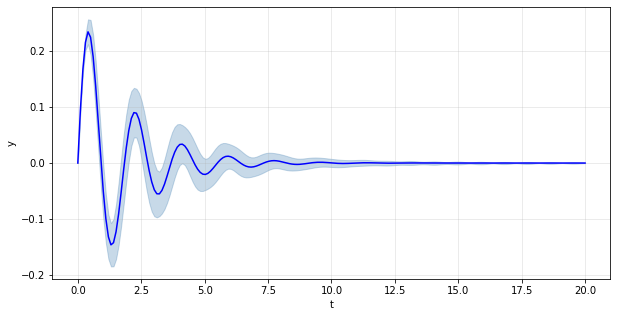

In [7]:
#--- SETTINGS ------
#Parameters
distType=['Norm','Norm']   #distribution type of the parameters q1, q2
nQ=[6,7]                   #number of samples
#PCE options
truncMethod='TP'     #'TP'=Tensor Product
                     #'TO'=Total Order  
sampleType=['GQ','GQ']  #'GQ'=Gauss Quadrature nodes ('Projection' or 'Regression')
                        #For other type of samples, see sampling.py, trainSample => only 'Regression' can be used
                        #'LHS': Latin Hypercube Sampling (only when all distType='Unif')    
pceSolveMethod='Regression' #'Regression': for any combination of sampling and truncation methods
                            #'Projection': only for 'GQ'+'TP'
if truncMethod=='TO':
   LMax=7   #max polynomial order in each parameter dimention       
#-------------------

p=len(distType) #number of parameters

#1. PCE dict
pceDict={'p':p,'truncMethod':truncMethod,'sampleType':sampleType,
         'pceSolveMethod':pceSolveMethod,'distType':distType}
if truncMethod=='TO':
   pceDict.update({'LMax':LMax,'pceSolveMethod':'Regression'})

#2. Generate the training samples
q=[]  #parameters in Q
xi=[] #parameters in \Gamma = mapped Q
qBound=[]  #Q: admissible space of the parameters
for i in range(p):
    samps=trainSample(sampleType=sampleType[i],GQdistType=distType[i],qInfo=qInfo[i],nSamp=nQ[i])
    q.append(samps.q)
    xi.append(samps.xi)
    qBound.append(samps.qBound)

#3. Make a tensor-product grid from the parameter samples
qGrid=vecs2grid(q)
xiGrid=vecs2grid(xi)

#4. Construct the PCE and estimate mean and variance of y(t)
pceMean=[]
pceVar=[]
for t_ in t:
    #model response at the training samples
    y_=modelFunc(t_,qGrid[:,0],qGrid[:,1])
    #construct the pce
    pce_=pce(fVal=y_,xi=xiGrid,pceDict=pceDict,nQList=nQ)
    pceMean.append(pce_.fMean)
    pceVar.append(pce_.fVar)
    #plot convergence of the pce at some t_
    if abs(t_-2)<5e-2:
       convPlot(coefs=pce_.coefs,distType=pceDict['distType'],kSet=pce_.kSet)

#5. plot mean+CI
pceMean=np.asarray(pceMean)
pceVar=np.asarray(pceVar)

plt.figure(figsize=(10,5))
ax=plt.gca()
plt.plot(t,pceMean,'-b')
ax.fill_between(t,pceMean-1.96*np.sqrt(pceVar),pceMean+1.96*np.sqrt(pceVar),color='steelblue',alpha=0.3)
#plt.plot(t,yMean,'-r')
#ax.fill_between(t,yMean-1.96*yStd,yMean+1.96*yStd,color='salmon',alpha=0.3)
plt.grid(alpha=0.3)
plt.xlabel('t')
plt.ylabel('y')
plt.show()

### 3. Perturbation method (Optional):

At a given time $t$:
1. Evaluate $\mathbf{S}=[\partial f/\partial C , \partial f/\partial K]$ at $C=\bar{C}$ and $K=\bar{K}$.
2. $\mathbb{E}[y(t)] = y(t;\bar{C},\bar{K}) $
3. $\mathbb{V}[y(t)] = \mathbf{S} \mathbf{V}_q \mathbf{S}^T$ where 
$$
\mathbf{V}_q =
\begin{bmatrix}
\sigma^2_C & 0 \\ 0 & \sigma^2_K
\end{bmatrix}
$$

### 4. Compute Sobol sensitivity indices

Hint: The PDF of a Gaussian random variable $x\sim\mathcal{N}(\mu,\sigma^2)$ is defined as, 
$$
\rho_X(x) = \frac{1}{\sqrt{2\pi} \sigma} \exp\left(-(x-\mu)^2/2\sigma^2\right)
$$

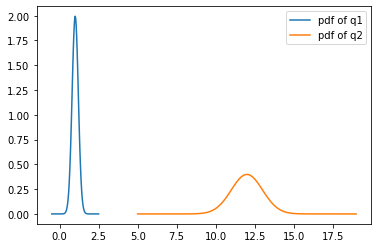

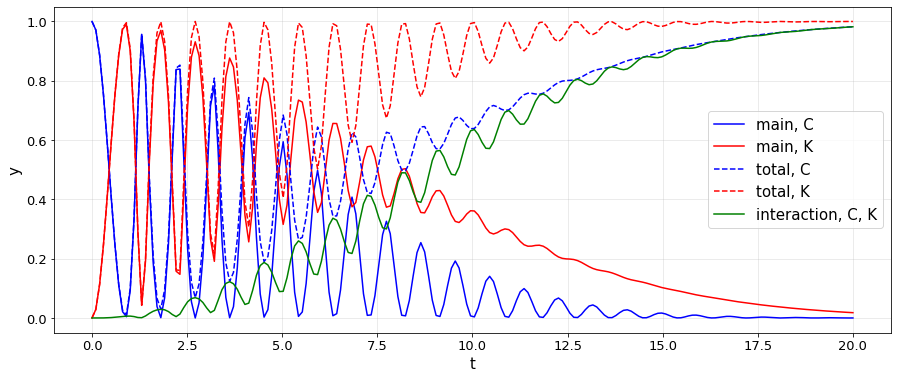

In [8]:
#--- SETTINGS --------
n=[101, 100]        #number of samples for q1 and q2
qInfo=[[1,0.2],             #info of the parameters
       [12,1]]
qBound=[[-.5,2.5],
       [5,19]]           #admissible range of the parameters
#-------------------
t=np.linspace(1E-8,tEnd,nT)   #start from a small value rather than 0

# 1. Generate uniformly-spaced values for the parameters; construct and plot the PDFs (probability density functions).
q=[]
pdf=[]
for i in range(p):
    q.append(np.linspace(qBound[i][0],qBound[i][1],n[i]))
    pdf_=np.exp(-(q[i]-qInfo[i][0])**2/(2*qInfo[i][1]**2))/(qInfo[i][1]*mt.sqrt(2*mt.pi))
    pdf.append(pdf_)
    plt.plot(q[i],pdf[i],label='pdf of q'+str(i+1))
plt.legend(loc='best')
plt.show()

# 2. Compute the Sobol indices of y(t) wrt C & K
Si=[[],[]]    #Main Sobol indices
STi=[[],[]]   #Total Sobol indices
Sij=[]        #Interaction index
qGrid=vecs2grid(q)
for t_ in t:
    #model response at the training samples
    y_=modelFunc(t_,qGrid[:,0],qGrid[:,1])
    y_=np.reshape(y_,n,order='F')
    #compute sobol indices        
    sobol_=sobol(q,y_,pdf=pdf)
    for i in range(p):
        Si[i].append(sobol_.Si[i])
        STi[i].append(sobol_.STi[i])
    Sij.append(sobol_.Sij)

#3. plot
plt.figure(figsize=(15,6))
plt.plot(t,Si[0],'-b',label='main, C')
plt.plot(t,Si[1],'-r',label='main, K')
plt.plot(t,STi[0],'--b',label='total, C')
plt.plot(t,STi[1],'--r',label='total, K')
plt.plot(t,Sij,'-g',label='interaction, C, K')
plt.legend(loc='best',fontsize=15)
plt.xlabel('t',fontsize=15)
plt.ylabel('y',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(alpha=0.3)
plt.show()